In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from IPython.display import display, HTML

In [63]:
course_chapter_items_df = pd.read_csv('./data/course_chapter_items.csv')
course_df = pd.read_csv('./data/courses.csv')
users_df = pd.read_csv('./data/users.csv')
subgroups_df = pd.read_csv('./data/subgroups.csv')

train_group_df = pd.read_csv('./data/train_group.csv')
test_seen_group_df = pd.read_csv('./data/test_seen_group.csv')
val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
test_unseen_group_df = pd.read_csv('./data/test_unseen_group.csv')
val_unseen_group_df = pd.read_csv('./data/val_unseen_group.csv')

train_df = pd.read_csv('./data/train.csv')
test_seen_df = pd.read_csv('./data/test_seen.csv')
val_seen_df = pd.read_csv('./data/val_seen.csv')
test_unseen_df = pd.read_csv('./data/test_unseen.csv')
val_unseen_df = pd.read_csv('./data/val_unseen.csv')

## 自建工具

In [193]:
def check_row_number_with_unique_amount(df, df_name, column):
    nrow = df.shape[0]
    nunique = pd.unique(df.loc[:,column]).shape[0]
    msg = f'dataframe {df_name} row number != unique {column} amount'
    assert nrow == nunique, msg
    print(f'dataframe {df_name} row number == unique {column} amount ({nrow} == {nunique})')

def check_unique_items_are_same_set(df1, df1_name, df1_column, df2, df2_name, df2_column):
    df1_set = set(df1.loc[:,df1_column].to_list())
    df2_set = set(df2.loc[:,df2_column].to_list())
    diff = df1_set.symmetric_difference(df2_set)
    msg = f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are different'
    assert len(diff) == 0, msg
    print(f'unique {df1_name}.{df1_column} & unique {df2_name}.{df2_column} are the same')

def long_series_fold_view(series, nrow=10, index_start_from=0):
    series = series.to_list()
    sta = 0 
    length = len(series)
    clips = []
    col_names = []
    for end in range(0, length, nrow):
        if end == 0:
            continue
        clips.append(series[sta :end])
        col_names.append(f"{sta+index_start_from}_{end+index_start_from-1}")
        sta = end
    else:
        if end < length:
            clips.append(series[end:])
            clips[-1] += [None]*(nrow-(length-end) )
            col_names.append(f"{end}_{end+nrow}")

    df = pd.DataFrame({f"{col_name}": clip for col_name, clip in zip(col_names, clips)})
    df.index = df.index + index_start_from

    return df

def sub_eda1(df, columns):
    for column in columns:
        view=df[[column]].describe()
        display(view)

        N = df[column].describe()['max']
        N = int(N)
        ax = df.plot.hist(column=[column], bins=100, xticks=range(0,N,100), figsize=(20,5), title=column)
        ax.tick_params(axis='x', rotation=45)

def sub_eda2(df, columns):
    for column in columns:
        print(f'column: {columns}')
        print(f'.describe():')
        view = df[[column]].describe()
        display(view)

        print(f'.value_counts().describe():')
        view = pd.DataFrame({column:df[column].value_counts()}).describe()
        display(view)

        print(f'.value_counts() fold view:')
        view = long_series_fold_view(df[column].value_counts(), nrow=10, index_start_from=1)
        display(view)
        
        print(f'.value_counts().plot()')
        df[column].value_counts().plot(figsize=(20,5))
        plt.show()


## NaN 檢查

In [128]:
course_chapter_items_df_nans = course_chapter_items_df.isnull().sum().sum()
course_df_nans = course_df.isnull().sum().sum()
users_df_nans = users_df.isnull().sum().sum()
subgroups_df_nans = subgroups_df.isnull().sum().sum()

train_group_df_nans = train_group_df.isnull().sum().sum()
test_seen_group_df_nans = test_seen_group_df.isnull().sum().sum()
val_seen_group_df_nans = val_seen_group_df.isnull().sum().sum()
test_unseen_group_df_nans = test_unseen_group_df.isnull().sum().sum()
val_unseen_group_df_nans = val_unseen_group_df.isnull().sum().sum()

train_df_nans = train_df.isnull().sum().sum()
test_seen_df_nans = test_seen_df.isnull().sum().sum()
val_seen_df_nans = val_seen_df.isnull().sum().sum()
test_unseen_df_nans = test_unseen_df.isnull().sum().sum()
val_unseen_df_nans = val_unseen_df.isnull().sum().sum()

pd.DataFrame({'df_name':[    
    "course_chapter_items", 
    "course", 
    "users", 
    "subgroups", 
    "train_group",
    "test_seen_group", 
    "val_seen_group", 
    "test_unseen_group", 
    "val_unseen_group", 
    "train", 
    "test_seen", 
    "val_seen", 
    "test_unseen", 
    "val_unseen"], 'nans':[
    course_chapter_items_df_nans, 
    course_df_nans, 
    users_df_nans, 
    subgroups_df_nans, 
    train_group_df_nans,
    test_seen_group_df_nans, 
    val_seen_group_df_nans, 
    test_unseen_group_df_nans, 
    val_unseen_group_df_nans, 
    train_df_nans, 
    test_seen_df_nans, 
    val_seen_df_nans, 
    test_unseen_df_nans, 
    val_unseen_df_nans]})

,df_name,nans
0,course_chapter_items,2029
1,course,69
2,users,293146
3,subgroups,0
4,train_group,705
5,test_seen_group,0
6,val_seen_group,33
7,test_unseen_group,0
8,val_unseen_group,96
9,train,0


In [129]:
course_chapter_items_df.isnull().sum()

course_id                     0
chapter_no                    0
chapter_id                    0
chapter_name                103
chapter_item_id               0
chapter_item_no               0
chapter_item_name             7
chapter_item_type             0
video_length_in_seconds    1919
dtype: int64

In [130]:
users_df.isnull().sum()

user_id                   0
gender                45195
occupation_titles    101510
interests             47810
recreation_names      98631
dtype: int64

In [131]:

train_group_df.isnull().sum()

user_id       0
subgroup    705
dtype: int64

In [132]:
val_seen_group_df.isnull().sum()

user_id      0
subgroup    33
dtype: int64

In [133]:
val_unseen_group_df.isnull().sum()

user_id      0
subgroup    96
dtype: int64

## 基本資料檢查

In [134]:
course_df_cid = pd.unique(course_df.course_id).shape[0]
course_chapter_items_df_cid = pd.unique(course_chapter_items_df.course_id).shape[0]
msg = f'amount of unique coursd_id unmatch in course_df, course_chapter_items_df ({course_df_cid} != {course_chapter_items_df_cid})'
assert course_df_cid == course_chapter_items_df_cid, msg

AssertionError: amount of unique coursd_id unmatch in course_df, course_chapter_items_df (728 != 727)

In [135]:
subgroups_df_sid = pd.unique(subgroups_df.subgroup_id).shape[0]
users_df_uid = pd.unique(users_df.user_id).shape[0]
print(f'unique subgroup id:{subgroups_df_sid}')
print(f'unique user id: {users_df_uid}')


train_df_uid_set = set(train_df.user_id.to_list())
train_group_df_uid_set = set(train_group_df.user_id.to_list())
identical_set = train_df_uid_set.symmetric_difference(train_group_df_uid_set)
msg = f'unique user_id not the same set in train_df, train_group_df'
assert len(identical_set) == 0, msg
print(f'train_df, train_group_df have the same unique user_id set')

check_unique_items_are_same_set(train_df, 'train_df', 'user_id', train_group_df, 'train_group_df', 'user_id')
check_row_number_with_unique_amount(train_df, 'train_df', 'user_id')
check_row_number_with_unique_amount(train_group_df, 'train_group_df', 'user_id')

unique subgroup id:91
unique user id: 130566
train_df, train_group_df have the same unique user_id set
unique train_df.user_id & unique train_group_df.user_id are the same
dataframe train_df row number == unique user_id amount (59737 == 59737)
dataframe train_group_df row number == unique user_id amount (59737 == 59737)


# 檢驗相同的users在train中購買的subgroups有多少比例 valid的時候也有購買(course的為0，不會重複購買)

In [136]:
#train_group_df = pd.read_csv('./data/train_group.csv')
#val_seen_group_df = pd.read_csv('./data/val_seen_group.csv')
continue_to_buy_ratio = []
for i, val_user_id in enumerate(val_seen_group_df["user_id"]):
    val_user_subgroups = str(val_seen_group_df["subgroup"][i]).split()
    index_in_train_df = train_group_df[train_group_df["user_id"] == val_user_id].index.tolist()[0]
    train_user_subgroups = str(train_group_df.at[index_in_train_df, 'subgroup']).split()
    #print(val_user_subgroups)
    #print(train_user_subgroups)
    continue_to_buy = 0
    for train_user_subgroup in train_user_subgroups:
        if train_user_subgroup in val_user_subgroups:
            continue_to_buy += 1
    continue_to_buy_ratio.append(continue_to_buy/len(train_user_subgroups))
print(f"mean continue_to_buy_ratio: {sum(continue_to_buy_ratio)/len(continue_to_buy_ratio)}")


mean continue_to_buy_ratio: 0.17182368307771648


# 敘述統計

## course_chapter_items

#### video_length_in_seconds

,video_length_in_seconds
count,19371.000000
mean,676.775592
std,575.299559
min,2.000000
25%,312.000000
50%,533.000000
75%,857.000000
max,7466.000000


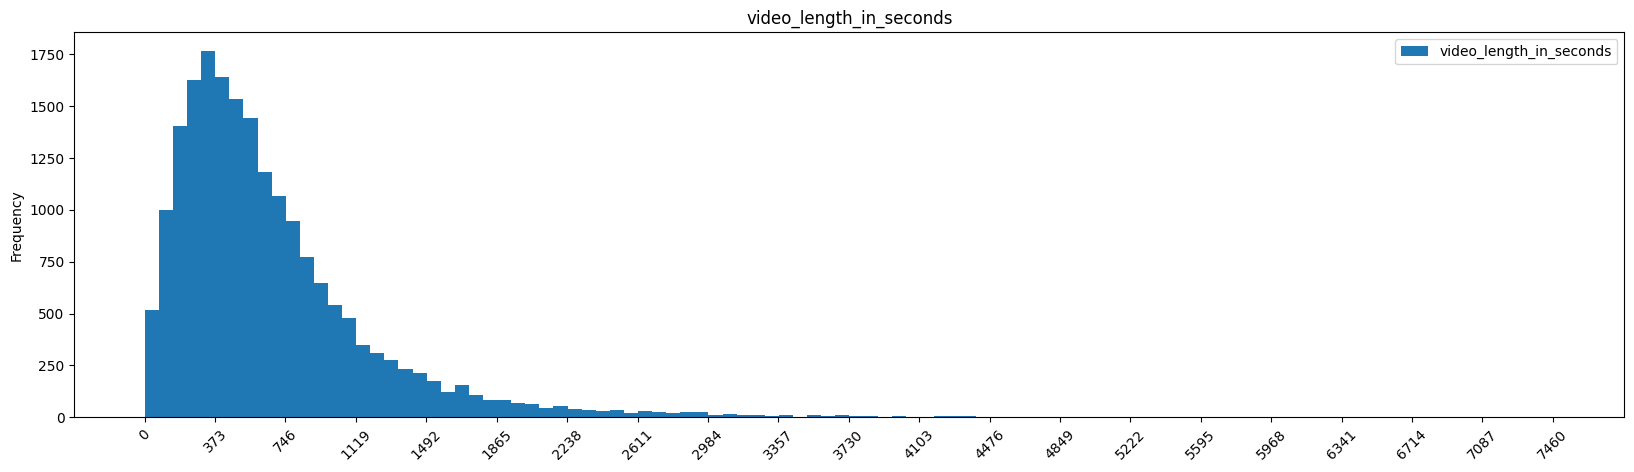

In [194]:
sub_eda1(course_chapter_items_df, ['video_length_in_seconds'])

In [190]:
course_chapter_items_df['video_length_in_seconds'].describe()['max']

7466.0

In [178]:
x = course_chapter_items_df['video_length_in_seconds'].describe()
x['max']

7466.0

,video_length_in_seconds
count,19371.000000
mean,676.775592
std,575.299559
min,2.000000
25%,312.000000
50%,533.000000
75%,857.000000
max,7466.000000


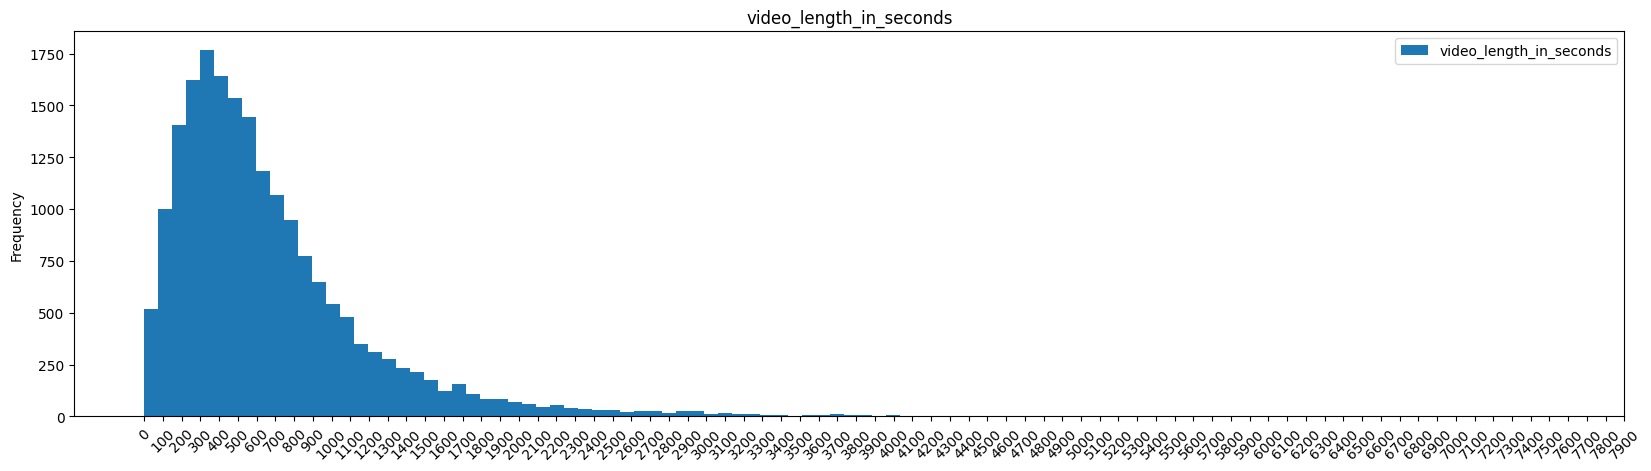

In [113]:
print()
view=course_chapter_items_df[['video_length_in_seconds']].describe()
display(view)

ax = course_chapter_items_df.plot.hist(column=['video_length_in_seconds'], bins=100, xticks=range(0,8000,100), figsize=(20,5), title='video_length_in_seconds')
ax.tick_params(axis='x', rotation=45)

#### chapter_item_no

In [167]:
course_chapter_items_df[['chapter_item_no']].describe()#.max().values.item()

,chapter_item_no
count,21290.000000
mean,9.129591
std,13.518396
min,1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,134.000000


In [120]:
course_chapter_items_df[['chapter_item_no']].value_counts().describe()

count     134.000000
mean      158.880597
std       494.123878
min         1.000000
25%         3.000000
50%         8.500000
75%        53.000000
max      3080.000000
dtype: float64

,chapter_item_no
count,134.000000
mean,158.880597
std,494.123878
min,1.000000
25%,3.000000
50%,8.500000
75%,53.000000
max,3080.000000


column: ['chapter_item_no']
.describe():


count    21290.000000
mean         9.129591
std         13.518396
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max        134.000000
Name: chapter_item_no, dtype: float64

.value_counts().describe():


count     134.000000
mean      158.880597
std       494.123878
min         1.000000
25%         3.000000
50%         8.500000
75%        53.000000
max      3080.000000
Name: chapter_item_no, dtype: float64

.value_counts() fold view:


,1_10,11_20,21_30,31_40,41_50,51_60,61_70,71_80,81_90,91_100,101_110,111_120,121_130,130_140
1,3080,433,136,67,38,19,12,8,6,4,3,3,2,1.0
2,2858,371,126,59,37,18,12,8,6,4,3,3,2,1.0
3,2507,316,114,57,36,17,10,8,6,4,3,2,2,1.0
4,2082,279,104,54,34,17,10,8,5,3,3,2,1,1.0
5,1635,248,97,50,33,17,9,8,5,3,3,2,1,NaN
6,1304,227,92,46,29,16,9,8,5,3,3,2,1,NaN
7,1005,203,87,46,28,15,9,7,5,3,3,2,1,NaN
8,785,187,77,44,23,14,8,7,5,3,3,2,1,NaN
9,638,175,74,43,23,14,8,6,5,3,3,2,1,NaN
10,536,155,72,39,19,12,8,6,4,3,3,2,1,NaN


.value_counts().plot()


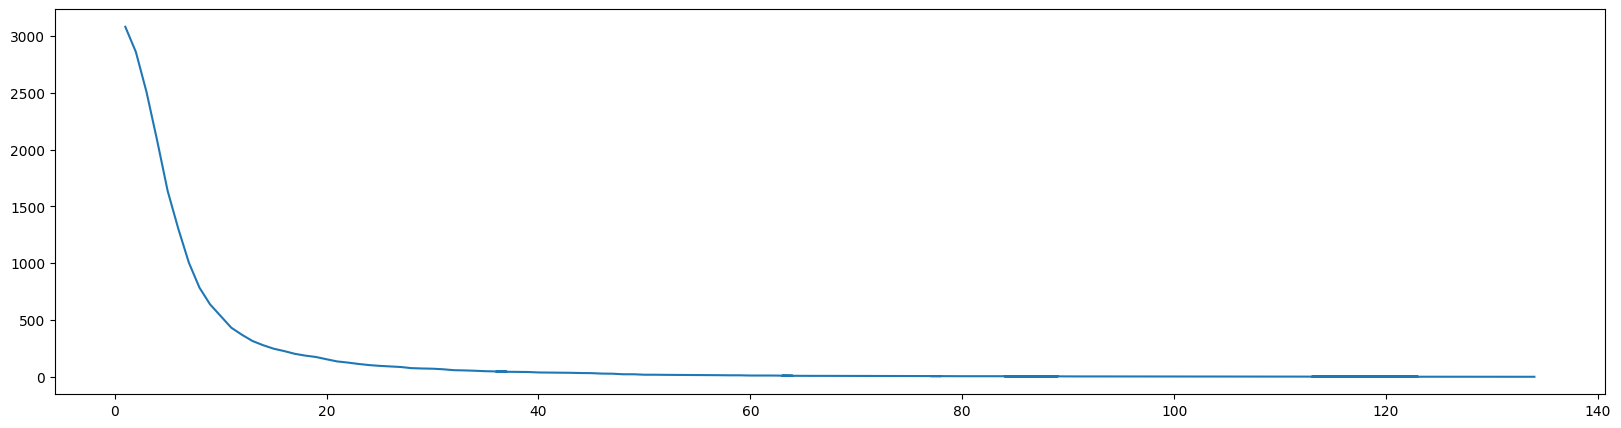

In [102]:
sub_eda1(course_chapter_items_df, ['chapter_item_no'])

#### chapter_no	

column: ['chapter_no']
.describe():


count    21290.000000
mean         3.278018
std          3.062744
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: chapter_no, dtype: float64

.value_counts().describe():


count      20.000000
mean     1064.500000
std      1983.003902
min        20.000000
25%        63.250000
50%       275.000000
75%      1088.250000
max      8570.000000
Name: chapter_no, dtype: float64

.value_counts() fold view:


,1_10,10_20
1,8570,253
2,2968,122
3,2668,99
4,1955,87
5,1476,65
6,959,58
7,692,41
8,514,39
9,381,26
10,297,20


.value_counts().plot()


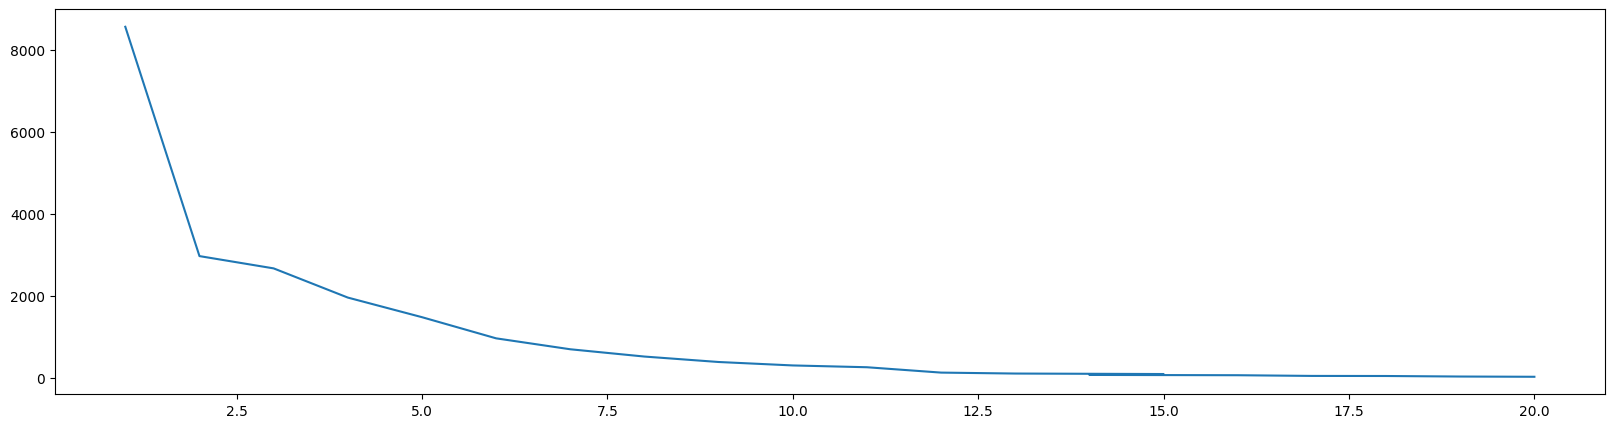

In [103]:
sub_eda1(course_chapter_items_df, ['chapter_no'])

In [108]:
course_chapter_items_df.shape[0], pd.unique(course_chapter_items_df.course_id).shape[0]

(21290, 727)

In [112]:
course_chapter_items_df.groupby('course_id').count()

,chapter_no,chapter_id,chapter_name,chapter_item_id,chapter_item_no,chapter_item_name,chapter_item_type,video_length_in_seconds
course_id,,,,,,,,
54d5a117065a7e0e00725ac0,4,4,4,4,4,4,4,4
54d5d9952246e60a009ec571,7,7,7,7,7,7,7,7
54d7148a2246e60a009ec588,8,8,8,8,8,8,8,6
54f1268f4ec3c809002e4a29,19,19,19,19,19,19,19,18
551171a938239d1000577864,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...
618c94c13a0b8d00073756e9,23,23,23,23,23,23,23,21
6191c002a20c140006edcfcd,22,22,22,22,22,22,22,20
61a5d89b3b954c0007022c77,32,32,32,32,32,32,32,30
